# Homework Part I

1. I have a drug group and a placebo group. I want some quantitative confirmation to see if they produce the ***same*** or ***different*** outcomes: `drug-A` and `placebo-A`.

2. I have a drug group and a placebo group: `drug-B` and `placebo-B`. The mean outcome is ***lower*** in the placebo group and I have a theory that may explain this, but I first need to rule out the possibility that the lower outcome is just due to chance.

In each case construct (i.e. actually write down) your two hypotheses, decide from how they are worded, whether they are one-tailed or two-tailed, then use statistical tests to assess which you should accept.

Hints:

* Test data sets for normality (are they pretty, do they have a normal distribution?). Use the test we have not used yet, the D’Agostino & Pearson test to provide probabilities of normality (prettiness).

* Test whether means differ significantly: When testing if means are different, you should use use either a two-tailed Mann-Whitney p-value, or a two-tailed T-test p-value, depending on the result of the normality test. Remember that `scipy.stats`'s `Mann-Whitney` function returns a one-tailed p-value.

H0:the placebo have SAME effect compared to drug


# Testing for Normality 

Recall that normality is prettiness. `Scipy` has a test for prettiness! Rather than guessing whether a distribution is normal, can we test for it!

* $H_0$ : 'Underlying distribution is normal.'
* $H_1$ : 'Underlying distribution is not normal.'

Actully, many different tests of normality (prettiness) exist - no universal agreement on which is best. 

A good solution is *D’Agostino & Pearson combined test*, provided by Python via the method [scipy.stats.normaltest](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html). This function tests the null hypothesis that a sample comes from a normal distribution.

In [1]:
# Read in the records.
import pandas as pd
import numpy as np
record = pd.read_csv("data2/drug-A.csv", header = None, names = {' '}) 
record2 = pd.read_csv("data2/placebo-A.csv", header = None, names = {' '}) 

In [2]:
import matplotlib.pyplot as plt
drug = np.array(record, dtype=float)
placebo = np.array(record2, dtype=float)
from scipy.stats import normaltest
k2, p = normaltest(drug)
print ("Skew = ", k2)
print ("H0 -come from a normal distribution: ")
if p<0.05:
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

plt.hist(drug, bins=5)
plt.legend(("p-value=%.2g"%p, ))

Skew =  [1.28741172]
H0 -come from a normal distribution: 
Accept.


Skew =  [1.22026289]
H0 -come from a normal distribution: 
Accept.


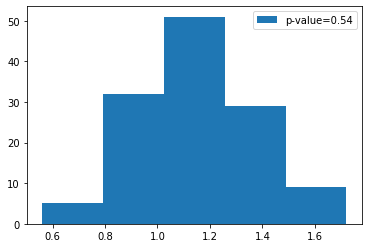

In [3]:
k2, p = normaltest(placebo)
print ("Skew = ", k2)
print ("H0 -come from a normal distribution: ")
if p<0.05:
    print ("Reject in favor of H1.")
else:
    print ("Accept.")

plt.hist(placebo, bins=5)
plt.legend(("p-value=%.2g"%p, ))

Both accept，so we can test remain part

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018BA0773608>,
      dtype=object)

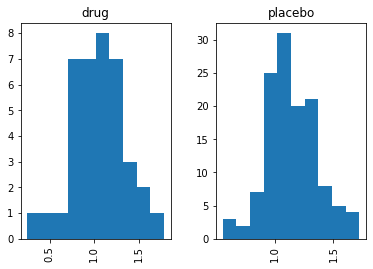

In [4]:
import pandas as pd
import numpy as np
colnames=['outcome'] 
drugA = pd.read_csv('data2/drug-A.csv',names=colnames, header=None)
drugA['group']='drug'
placeboA = pd.read_csv('data2/placebo-A.csv',names=colnames, header=None)
placeboA['group']='placebo'
trial_data = pd.concat([drugA, placeboA], ignore_index=True)
trial_data.hist('outcome', by='group')

## Practice

[scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ttest_ind.html) is
a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that ***the populations have identical variances***.

The **T-test** measures whether the average (expected) value differs significantly across samples. If we observe a **large** p-value, for example larger than 0.1, then we cannot reject the null hypothesis of identical average scores, we have to say *there is nothing strange going on*. If the p-value is **smaller than the threshold**, then we reject the null hypothesis of equal averages (*there is something interesting going on*).

Note that this test works on averages (expected) values, and that a **point estimate** does *not* capture the richness of all available statistics. In fact, it often returns bad results, *such as for this drug/placebo dataset*!

Let's do the estimation for our dataset.

In [5]:
from scipy.stats import ttest_ind
combined_outcome = np.concatenate((drugA.outcome, placeboA.outcome))
print(len(drugA.outcome))
print(len(placeboA.outcome))
print( drugA.outcome.mean() )
print( placeboA.outcome.mean() )
print( combined_outcome.mean() )

# we run the t-test without supposing the variance is the same (more general)
ttest_ind(a= drugA.outcome,
          b= placeboA.outcome,
          equal_var=False)

38
126
1.0489473684210526
1.1421428571428576
1.1205487804878047


Ttest_indResult(statistic=-1.7473607598380747, pvalue=0.08686705804164516)

The test yields a p-value of 0.0868, which means ***there is a 8% chance we'd see sample data this far apart statistically if the two groups tested are actually identical***. 

If we were using a 95% confidence level, we would **fail** to reject the null hypothesis, since the p-value is greater than the corresponding significance level of 0.05. And so we conclude that the drug is as effective as placebo at a 95% confidence level: there is nothing interesting going on. At a significance level of 0.05, drug outcome on IQ is statistically **nonsignificant**.

For *another* perspective, the test result shows the test statistic is equal to -1.7473. This test statistic tells us how much the sampled mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we need to reject the null hypothesis. We get the quantiles of the [Student-T](https://en.wikipedia.org/wiki/Student%27s_t-distribution) distribution using `stats.t.ppf`.

In [6]:
from scipy.stats import t
t.ppf(q=0.05,  # Quantile to check
      df=37)  # Degrees of freedom

-1.687093616710988

Here we see that our test statistic of -1.74 is ***within the quantile of the t-distribution (1.68)***, so we should reject H0

### 1.2  I have a drug group and a placebo group: drug-B and placebo-B. The mean outcome is lower in the placebo group and I have a theory that may explain this, but I first need to rule out the possibility that the lower outcome is just due to chance.

H0:The mean outcome is lower in the placebo group <br>
H1:The mean outcome is higher in the placebo group

In [7]:
from scipy.stats import mannwhitneyu
colnames=['outcome'] 
drugB = pd.read_csv('data2/drug-B.csv',names=colnames, header=None)
drugB['group']='drug'
placeboB = pd.read_csv('data2/placebo-B.csv',names=colnames, header=None)
placeboB['group']='placebo'
statistic, pvalue = mannwhitneyu(placeboB.outcome.values,drugB.outcome.values,alternative = 'greater')
print("statistic: ", statistic)
print("pvalue: ", pvalue)
if pvalue< 0.05:
    print("Reject HO")
else:
    print("Accept HO")

statistic:  512.5
pvalue:  0.9785671478786763
Accept HO


# Homework Part II: Random variates from arbitrary distribution


[-1.6284459   1.49601817  0.42446775 ... -0.70839962  0.87294655
  1.45591929]
[-0.96878966  0.04114919  0.27370764 ... -0.65901703  0.48881942
 -1.78028545]


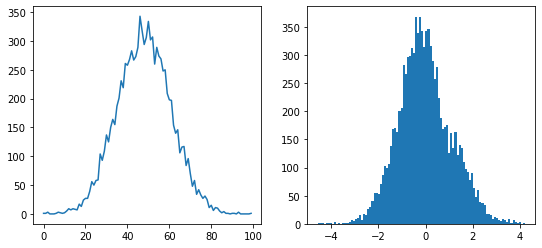

In [9]:
from functools import partial
import numpy
from matplotlib import pyplot
import scipy.stats
import numpy as np


# Define a PDF

x_samples = scipy.stats.norm.rvs(size=10000, loc=0, scale=1.5, random_state=123)
PDF = numpy.empty(x_samples.shape)
PDF[x_samples < 0] = numpy.round(x_samples[x_samples < 0] + 3.5) / 3
PDF[x_samples >= 0] = 0.5 * numpy.cos(numpy.pi * x_samples[x_samples >= 0]) + 0.5
PDF /= numpy.sum(PDF)

# Calculate approximated CDF
CDF = numpy.empty(PDF.shape)
cumulated = 0
for i in range(CDF.shape[0]):
    cumulated += PDF[i]
    CDF[i] = cumulated

# Generate samples
generate = partial(numpy.interp, xp=CDF, fp=x_samples)
u_rv = numpy.random.random(10000)
x = generate(u_rv)

# Visualization
fig, (ax0, ax1) = pyplot.subplots(ncols=2, figsize=(9, 4))
hist = np.histogram(x_samples, bins=100)
ax0.plot(hist[0], label='histogram')
ax1.hist(x, 100)
print(x_samples)
print(x)
pyplot.show()

### Left: original histogram data  &nbsp;&nbsp;    Right: generated data based on original
